In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import scipy
from scipy import stats
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import copy


%load_ext autoreload
%autoreload 2

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools
import figures as figures

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()



In [2]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

In [4]:
schubert_data = p.read_csv(f'{home_dir}/data/Schubert_et_al_2022/combined_perGene.csv')

In [7]:
q_cols = [col for col in schubert_data.columns if '_q' in col]
log2fc_cols = [col for col in schubert_data.columns if '_log2fc' in col]


schubert_data[schubert_data['gene']=='IRA1']

,geneSys,gene,geneDescr,essential,Eno2_log2fc,Fas1_log2fc,Fas2_log2fc,Htb2_log2fc,Rnr2_log2fc,Rpl9A_log2fc,...,Fas2_q,Htb2_q,Rnr2_q,Rpl9A_q,Ssa1_q,Tdh1_q,Tdh2_q,Tdh3_q,Yhb1_q,FDR0.05_count
2605,YBR140C,IRA1,GTPase-activating protein; negatively regulate...,True,0.762501,0.283887,-0.617963,-0.57636,-0.239306,0.598195,...,0.454997,0.352167,0.863138,4.791525e-07,0.296344,0.000187,0.000573,0.787886,0.000001,5


In [48]:

unique_genes = np.unique([gene for gene in merged_fitness['gene'].values if not p.isnull(gene) if gene in tools.mutation_color_map.keys()])

overlapping_genes = schubert_data[schubert_data['gene'].isin(unique_genes)]
overlapping_gene_list = overlapping_genes['gene'].values

In [49]:
overlapping_genes

,geneSys,gene,geneDescr,essential,Eno2_log2fc,Fas1_log2fc,Fas2_log2fc,Htb2_log2fc,Rnr2_log2fc,Rpl9A_log2fc,...,Fas2_q,Htb2_q,Rnr2_q,Rpl9A_q,Ssa1_q,Tdh1_q,Tdh2_q,Tdh3_q,Yhb1_q,FDR0.05_count
7,YAL056W,GPB2,Multistep regulator of cAMP-PKA signaling; inh...,False,0.131452,-0.131322,0.295758,0.234837,-0.125831,0.368032,...,0.988598,0.578999,0.897754,2.176498e-01,0.908076,4.282127e-01,7.793047e-01,0.874905,9.250724e-01,0
128,YJL128C,PBS2,MAP kinase kinase of the HOG signaling pathway...,False,0.292660,-0.162829,-0.475922,0.371039,0.523713,-0.743510,...,0.866566,0.336831,0.692523,1.580827e-02,0.858994,8.403312e-01,8.957321e-01,0.901092,1.416735e-01,1
149,YJL101C,GSH1,Gamma glutamylcysteine synthetase; catalyzes t...,False,0.358599,0.247571,0.211149,-0.315836,0.172872,0.521854,...,0.983555,0.643719,0.897754,3.826035e-01,0.861858,6.373650e-01,6.662431e-01,0.894798,2.218198e-26,1
222,YJL005W,CYR1,Adenylate cyclase; required for cAMP productio...,True,-0.437842,1.040981,0.653761,-1.021212,-0.474444,-1.456870,...,0.837662,0.008095,0.512334,1.862346e-29,0.712636,9.505386e-27,8.407465e-19,0.615425,6.347083e-24,5
273,YJR066W,TOR1,PIK-related protein kinase and rapamycin targe...,False,0.224548,0.438747,0.416591,0.351381,-0.383702,0.230261,...,0.467161,0.408854,0.802493,6.677862e-01,0.608789,2.490638e-01,5.905703e-01,0.885443,4.549676e-01,0
441,YKL085W,MDH1,Mitochondrial malate dehydrogenase; catalyzes ...,False,0.330759,0.112492,0.179883,0.243224,0.051521,-0.171867,...,0.986305,0.553132,0.899374,6.449056e-01,0.893959,6.925713e-01,9.370879e-01,0.880688,9.286473e-01,0
486,YKL025C,PAN3,Essential subunit of the Pan2p-Pan3p poly(A)-r...,False,0.037996,0.205923,0.121686,0.144571,0.040388,0.070556,...,0.988598,0.650885,0.899374,6.247374e-01,0.881507,8.612772e-01,9.629710e-01,0.901092,9.524157e-01,0
627,YLL013C,PUF3,Protein of the mitochondrial outer surface; li...,False,-0.078645,0.538691,0.448439,0.262208,-0.242439,0.329782,...,0.797954,0.755608,0.879864,2.572642e-01,0.826872,7.790487e-01,9.624190e-01,0.874843,6.576012e-08,1
718,YLR113W,HOG1,Mitogen-activated protein kinase involved in o...,False,0.166924,-0.280478,-0.357156,-0.187872,0.430435,0.401411,...,0.847835,0.807124,0.591649,3.753864e-01,0.756777,7.634678e-01,3.497492e-01,0.900950,2.270609e-03,1
765,YLR178C,TFS1,"Inhibitor of carboxypeptidase Y (Prc1p), and R...",False,0.348497,0.321849,0.442792,-0.461653,0.633751,0.311545,...,0.983555,0.489251,0.771578,6.508685e-01,0.898343,5.393235e-01,8.217707e-01,0.901092,6.052869e-01,0


[0.87789648 0.89920928 0.988598   0.57899891 0.89775406 0.2176498
 0.90807613 0.42821269 0.77930474 0.874905   0.92507241]
#2171b5
[0.82522936 0.90034832 0.86656586 0.33683096 0.69252297 0.01580827
 0.85899383 0.84033117 0.89573206 0.90109193 0.14167352]
#00cdcd
[5.02395642e-01 8.84429858e-01 9.83555097e-01 6.43718847e-01
 8.97754061e-01 3.82603547e-01 8.61857506e-01 6.37365017e-01
 6.66243056e-01 8.94797603e-01 2.21819798e-26]
gold
[1.52489493e-01 6.38408269e-02 8.37662493e-01 8.09451003e-03
 5.12334078e-01 1.86234568e-29 7.12635969e-01 9.50538605e-27
 8.40746512e-19 6.15425398e-01 6.34708286e-24]
#6baed6
[0.8194199  0.66346386 0.46716055 0.40885374 0.80249265 0.66778621
 0.60878877 0.24906377 0.59057028 0.88544299 0.45496763]
#bcbddc
[0.60740529 0.89920928 0.98630481 0.5531318  0.8993743  0.64490561
 0.8939585  0.69257134 0.93708786 0.8806883  0.92864727]
#bae4b3
[0.92990634 0.75926313 0.988598   0.65088486 0.8993743  0.62473735
 0.88150688 0.86127722 0.96297104 0.90109193 0.95241567

(0.0, 0.1)

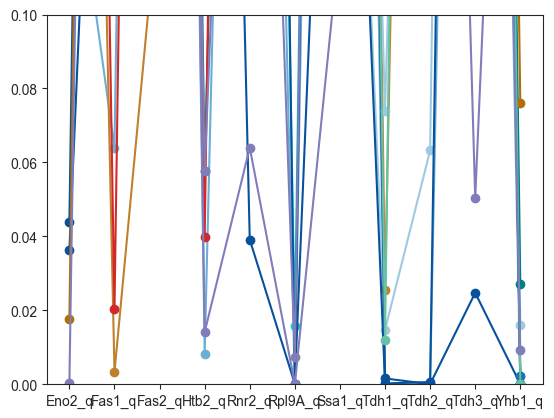

In [50]:
plt.figure()
for gene in overlapping_gene_list:
    
    this_gene = overlapping_genes[overlapping_genes['gene']==gene]
    
    print(this_gene[q_cols].values[0])
    print(tools.find_mutation_color(gene))
    plt.plot(range(len(this_gene[q_cols].values[0])),this_gene[q_cols].values[0],
             label=gene,color=tools.find_mutation_color(gene),marker='o')
plt.xticks(range(len(q_cols)),q_cols)

plt.ylim(0,0.1)
# plt.legend()

In [51]:
overlapping_genes.sort_values('FDR0.05_count',ascending=False)

,geneSys,gene,geneDescr,essential,Eno2_log2fc,Fas1_log2fc,Fas2_log2fc,Htb2_log2fc,Rnr2_log2fc,Rpl9A_log2fc,...,Fas2_q,Htb2_q,Rnr2_q,Rpl9A_q,Ssa1_q,Tdh1_q,Tdh2_q,Tdh3_q,Yhb1_q,FDR0.05_count
1709,YOL081W,IRA2,GTPase-activating protein; negatively regulate...,False,0.719536,-0.547796,-0.408269,-0.453311,-0.893590,1.292580,...,0.931283,0.552886,0.039084,6.647730e-05,0.855798,1.538410e-03,3.782747e-18,0.024714,4.293468e-08,7
222,YJL005W,CYR1,Adenylate cyclase; required for cAMP productio...,True,-0.437842,1.040981,0.653761,-1.021212,-0.474444,-1.456870,...,0.837662,0.008095,0.512334,1.862346e-29,0.712636,9.505386e-27,8.407465e-19,0.615425,6.347083e-24,5
2605,YBR140C,IRA1,GTPase-activating protein; negatively regulate...,True,0.762501,0.283887,-0.617963,-0.576360,-0.239306,0.598195,...,0.454997,0.352167,0.863138,4.791525e-07,0.296344,1.869320e-04,5.733254e-04,0.787886,1.228329e-06,5
4340,YHR205W,SCH9,AGC family protein kinase; functional ortholog...,False,-1.390940,-0.259330,0.545211,-0.980819,0.869432,-1.776777,...,0.837662,0.014081,0.064012,1.142108e-57,0.120915,6.052746e-01,4.727314e-01,0.050356,3.330744e-01,3
1510,YNL098C,RAS2,GTP-binding protein; regulates nitrogen starva...,False,0.357265,-0.305792,0.251459,-0.357104,-0.419441,-0.564286,...,0.983555,0.686274,0.875057,2.856403e-01,0.292757,1.464319e-02,6.322495e-02,0.885443,1.598344e-02,2
1527,YNL076W,MKS1,Pleiotropic negative transcriptional regulator...,False,0.539886,-0.925909,-0.749478,0.469134,0.220583,-0.502701,...,0.133470,0.368746,0.875057,1.362631e-01,0.898343,2.536170e-02,6.353285e-01,0.360208,7.800053e-01,2
4323,YHR186C,KOG1,Subunit of TORC1; TORC1 is a rapamycin-sensiti...,True,-0.314131,-0.448339,0.661624,0.708230,-0.724905,-1.045366,...,0.702088,0.057543,0.358260,7.448008e-03,0.844297,6.837325e-01,1.784479e-01,0.617952,9.103915e-03,2
3622,YER165W,PAB1,Poly(A) binding protein; part of the 3'-end RN...,True,0.444172,1.267880,0.342243,-0.703585,0.291564,0.360529,...,0.855506,0.039730,0.858995,2.235057e-01,0.761378,1.915532e-01,8.494604e-01,0.557981,5.856138e-01,2
3485,YEL007W,MIT1,Transcriptional regulator of pseudohyphal grow...,False,-0.250892,0.363082,0.107116,-0.388214,-0.079274,0.423136,...,0.989055,0.359289,0.899374,1.590888e-01,0.862955,1.204023e-02,9.250069e-01,0.901092,1.381961e-04,2
3104,YDR099W,BMH2,"14-3-3 protein, minor isoform; controls proteo...",False,0.496522,-0.042703,0.045712,-0.068518,-0.059019,-0.230393,...,0.995762,0.781489,0.899374,3.165819e-01,0.822376,8.509218e-01,9.323463e-01,0.901092,7.617766e-02,1


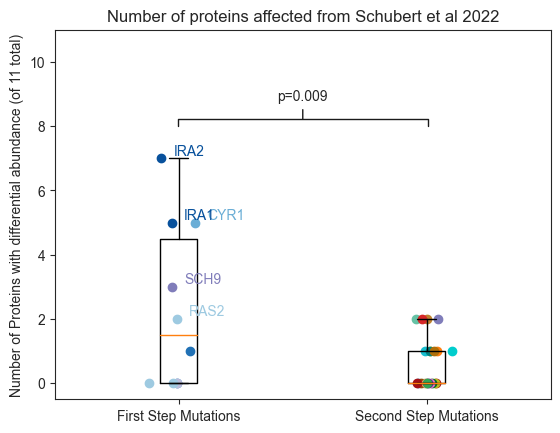

In [99]:
first_step_genes = tools.gene_pathway_map['Ras/PKA'] + ['TOR1','SCH9']
first_step_counts = []
second_step_counts = []

np.random.seed(99)
for gene in overlapping_gene_list:
    
    
    if gene in first_step_genes:
        this_count = overlapping_genes[overlapping_genes['gene']==gene]['FDR0.05_count'].values[0]
        first_step_counts.append(this_count)
        
        jitter = tools.jitter_point(0,0.05)
        
        plt.scatter(jitter,this_count,color=tools.find_mutation_color(gene))
        
        if this_count > 1:
            plt.annotate(gene,(jitter,this_count),(jitter+0.05,this_count+0.1),color=tools.find_mutation_color(gene))
        
    else:
        this_count = overlapping_genes[overlapping_genes['gene']==gene]['FDR0.05_count'].values[0]
        second_step_counts.append(this_count)
        
        jitter = tools.jitter_point(1,0.05)
        
        plt.scatter(jitter,this_count,color=tools.find_mutation_color(gene))
#         plt.annotate(gene,(jitter,this_count),(jitter+0.2,this_count+0.1),color=tools.find_mutation_color(gene))

plt.boxplot(first_step_counts,positions=[0])
plt.boxplot(second_step_counts,positions=[1])

plt.title('Number of proteins affected from Schubert et al 2022')
        
plt.ylabel('Number of Proteins with differential abundance (of 11 total)')
plt.xticks([0,1],['First Step Mutations','Second Step Mutations'])

plt.ylim(-0.5,11)

ttest = scipy.stats.ttest_ind(first_step_counts,second_step_counts)

plt.annotate(f'p={ttest.pvalue:.3f}', xy=(0.5,0.75), xytext=(0.5,0.8),xycoords='axes fraction',ha='center', va='bottom',
           arrowprops=dict(arrowstyle='-[, widthB=9, lengthB=0.5', lw=1.0,color='k'))


plt.savefig(f'{home_dir}/figures/analysis/modularity/modularity_of_protein_abundance.pdf',bbox_inches='tight')

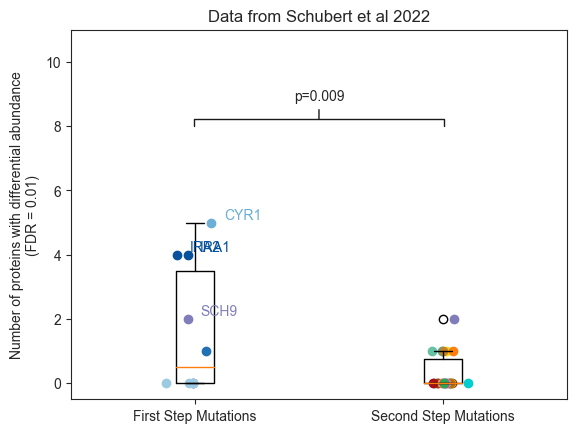

In [109]:
first_step_genes = tools.gene_pathway_map['Ras/PKA'] + ['TOR1','SCH9']
first_step_counts = []
second_step_counts = []

np.random.seed(99)

fdr = 0.01
for gene in overlapping_gene_list:
    
    
    if gene in first_step_genes:
        this_count = np.sum(overlapping_genes[overlapping_genes['gene']==gene][q_cols].values < fdr)
        first_step_counts.append(this_count)
        
        jitter = tools.jitter_point(0,0.05)
        
        plt.scatter(jitter,this_count,color=tools.find_mutation_color(gene))
        
        if this_count > 1:
            plt.annotate(gene,(jitter,this_count),(jitter+0.05,this_count+0.1),color=tools.find_mutation_color(gene))
        
    else:
        this_count = np.sum(overlapping_genes[overlapping_genes['gene']==gene][q_cols].values < fdr)
        second_step_counts.append(this_count)
        
        jitter = tools.jitter_point(1,0.05)
        
        plt.scatter(jitter,this_count,color=tools.find_mutation_color(gene))
#         plt.annotate(gene,(jitter,this_count),(jitter+0.2,this_count+0.1),color=tools.find_mutation_color(gene))

plt.boxplot(first_step_counts,positions=[0])
plt.boxplot(second_step_counts,positions=[1])

plt.title('Data from Schubert et al 2022')
        
plt.ylabel(f'Number of proteins with differential abundance\n(FDR = {fdr:.2f})')
plt.xticks([0,1],['First Step Mutations','Second Step Mutations'])

plt.ylim(-0.5,11)

ttest = scipy.stats.ttest_ind(first_step_counts,second_step_counts)

plt.annotate(f'p={ttest.pvalue:.3f}', xy=(0.5,0.75), xytext=(0.5,0.8),xycoords='axes fraction',ha='center', va='bottom',
           arrowprops=dict(arrowstyle='-[, widthB=9, lengthB=0.5', lw=1.0,color='k'))


plt.savefig(f'{home_dir}/figures/analysis/modularity/modularity_of_protein_abundance_FDR{fdr}.pdf',bbox_inches='tight')

In [102]:
np.sum(overlapping_genes[overlapping_genes['gene']==gene][q_cols].values < 0.9)

10

In [111]:
overlapping_genes[overlapping_genes['gene']=='KSP1']

,geneSys,gene,geneDescr,essential,Eno2_log2fc,Fas1_log2fc,Fas2_log2fc,Htb2_log2fc,Rnr2_log2fc,Rpl9A_log2fc,...,Fas2_q,Htb2_q,Rnr2_q,Rpl9A_q,Ssa1_q,Tdh1_q,Tdh2_q,Tdh3_q,Yhb1_q,FDR0.05_count
4240,YHR082C,KSP1,Serine/threonine protein kinase; associates wi...,False,0.061697,-0.324665,-0.503008,0.223937,0.408453,0.275855,...,0.829669,0.426135,0.746789,0.601456,0.88243,0.851116,0.732327,0.901092,0.87395,0


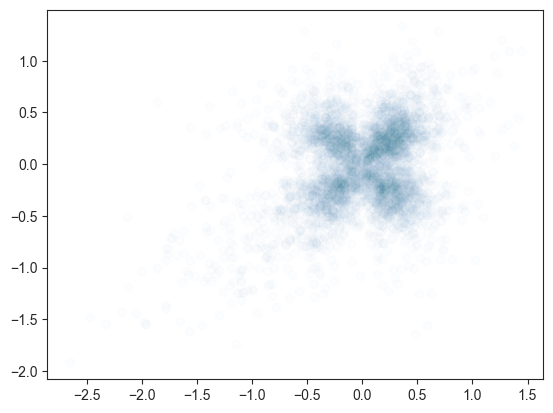

In [113]:
plt.scatter(schubert_data['Fas1_log2fc'].values,schubert_data['Fas2_log2fc'].values,alpha=0.01)

In [114]:
q_cols

['Eno2_q',
 'Fas1_q',
 'Fas2_q',
 'Htb2_q',
 'Rnr2_q',
 'Rpl9A_q',
 'Ssa1_q',
 'Tdh1_q',
 'Tdh2_q',
 'Tdh3_q',
 'Yhb1_q']

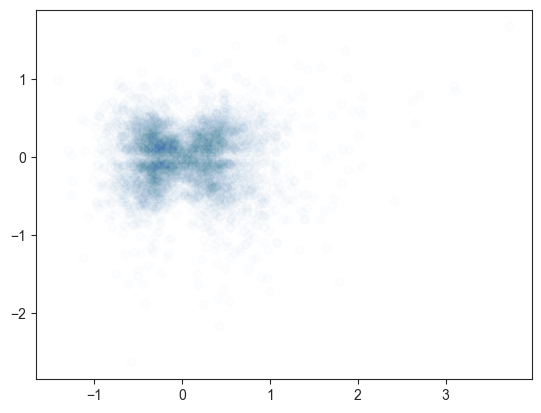

In [116]:
plt.scatter(schubert_data['Tdh1_log2fc'].values,schubert_data['Tdh3_log2fc'].values,alpha=0.01)